La función de Rosenbrock es la función que intentaremos minimizar. Es comúnmente conocida como el "valle de Rosenbrock". La forma general en
𝑛
 dimensiones es:

Para un vector $\mathbf{x} = (x_1, ..., x_n)$ de dimensión $n$, la función se define como:
$f(\mathbf{x}) = \sum_{i=1}^{n-1} [100(x_{i+1} - x_i^2)^2 + (1 - x_i)^2]$


In [13]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [8]:

def rosenbrock(x):
    """
    Función de Rosenbrock
    f(x) = Σ(i=1 to n-1) [100(x[i+1] - x[i]^2)^2 + (1 - x[i])^2]
    """
    suma = 0
    for i in range(len(x)-1):
        suma += 100 * (x[i+1] - x[i]**2)**2 + (1 - x[i])**2
    return suma

La población inicial estará compuesta por vectores aleatorios dentro de un rango definido. La función crear_poblacion_inicial generará una lista de individuos aleatorios.

In [7]:
def crear_poblacion_inicial(tamano_poblacion, dimensiones, limites=(-2.048, 2.048)):

    poblacion = []
    for _ in range(tamano_poblacion):
        individuo = [random.uniform(limites[0], limites[1]) for _ in range(dimensiones)]
        poblacion.append(individuo)
    return poblacion


Evaluamos la población calculando el valor de la función de Rosenbrock para cada individuo. Cuanto menor sea el valor de la función, mejor será el individuo.

In [6]:
def evaluar_poblacion(poblacion):

    fitness = [rosenbrock(individuo) for individuo in poblacion]
    return fitness

La selección por torneo elige a los mejores individuos de un grupo aleatorio para ser padres de la siguiente generación.

In [5]:
def seleccion_torneo(poblacion, fitness, tamano_torneo=3):
    """Selección por torneo"""
    idx_seleccionado = random.sample(range(len(poblacion)), tamano_torneo)
    mejor_idx = min(idx_seleccionado, key=lambda x: fitness[x])
    return poblacion[mejor_idx]


El cruce aritmético genera un hijo a partir de dos padres seleccionados. Aquí usamos una combinación ponderada de los genes de ambos padres.

In [9]:
def cruce(padre1, padre2):
    """Cruce aritmético"""
    alpha = random.random()
    hijo = [alpha * p1 + (1 - alpha) * p2 for p1, p2 in zip(padre1, padre2)]
    return hijo


La mutación gaussiana cambia un valor de un individuo añadiendo un ruido gaussiano.

In [30]:
def mutacion(individuo, tasa_mutacion=0.2, limites=(-2.048, 2.048)):
    """Mutación gaussiana"""
    mutado = []
    for gen in individuo:
        if random.random() < tasa_mutacion:
            # Mutación gaussiana
            sigma = (limites[1] - limites[0]) * 0.2
            nuevo_gen = gen + random.gauss(0, sigma)
            nuevo_gen = max(min(nuevo_gen, limites[1]), limites[0])  # Asegurar que esté dentro de los límites
            mutado.append(nuevo_gen)
        else:
            mutado.append(gen)
    return mutado


Ahora implementamos el ciclo principal del algoritmo evolutivo: creamos la población, seleccionamos, cruzamos y mutamos para generar nuevas generaciones, y guardamos el mejor resultado.

In [37]:
def optimizar(tamano_poblacion=50, generaciones=100, dimensiones=2, limites=(-2.048, 2.048)):
    poblacion = crear_poblacion_inicial(tamano_poblacion, dimensiones, limites)
    mejor_historico = float('inf')
    mejor_solucion = None
    historial_mejores = []
    historial_fitness = []  # Para almacenar el fitness de todos los individuos en cada generación

    for gen in range(generaciones):
        fitness = evaluar_poblacion(poblacion)

        # Mejor histórico
        mejor_actual = min(fitness)
        if mejor_actual < mejor_historico:
            mejor_historico = mejor_actual
            mejor_solucion = poblacion[fitness.index(mejor_actual)]

        historial_mejores.append(mejor_historico)
        historial_fitness.append(fitness)  # Guardar el fitness de todos los individuos

        nueva_poblacion = []

        # Elitismo
        n_elite = 5
        poblacion_elite = sorted(zip(fitness, poblacion))[:n_elite]
        nueva_poblacion.extend([individuo for _, individuo in poblacion_elite])

        # Generar resto de la población
        while len(nueva_poblacion) < tamano_poblacion:
            padre1 = seleccion_torneo(poblacion, fitness)
            padre2 = seleccion_torneo(poblacion, fitness)
            hijo = cruce(padre1, padre2)
            hijo = mutacion(hijo)
            nueva_poblacion.append(hijo)

        poblacion = nueva_poblacion

        # Mostrar progreso cada 100 generaciones
        if (gen + 1) % 50 == 0:
            print(f"Generación {gen + 1}: Mejor fitness = {mejor_historico}")

    return mejor_solucion, mejor_historico, historial_mejores, historial_fitness, poblacion


Generación 50: Mejor fitness = 0.0031991092289536554
Generación 100: Mejor fitness = 4.454785453405085e-05
Generación 150: Mejor fitness = 4.3708188283859765e-05
Generación 200: Mejor fitness = 4.298962789030373e-05
Generación 250: Mejor fitness = 2.999925924336423e-07
Generación 300: Mejor fitness = 2.9999257453260447e-07
Generación 350: Mejor fitness = 2.9816732421563316e-07
Generación 400: Mejor fitness = 2.975652263019617e-07
Generación 450: Mejor fitness = 2.9688799197347816e-07
Generación 500: Mejor fitness = 2.961468101853842e-07
Generación 550: Mejor fitness = 2.954074367008591e-07
Generación 600: Mejor fitness = 2.954074367008591e-07
Generación 650: Mejor fitness = 2.947149180940638e-07
Generación 700: Mejor fitness = 2.946769277445623e-07
Generación 750: Mejor fitness = 2.0342193747815859e-07
Generación 800: Mejor fitness = 1.877523271153216e-07
Generación 850: Mejor fitness = 1.7380089569380426e-07
Generación 900: Mejor fitness = 1.698774976989973e-07
Generación 950: Mejor f

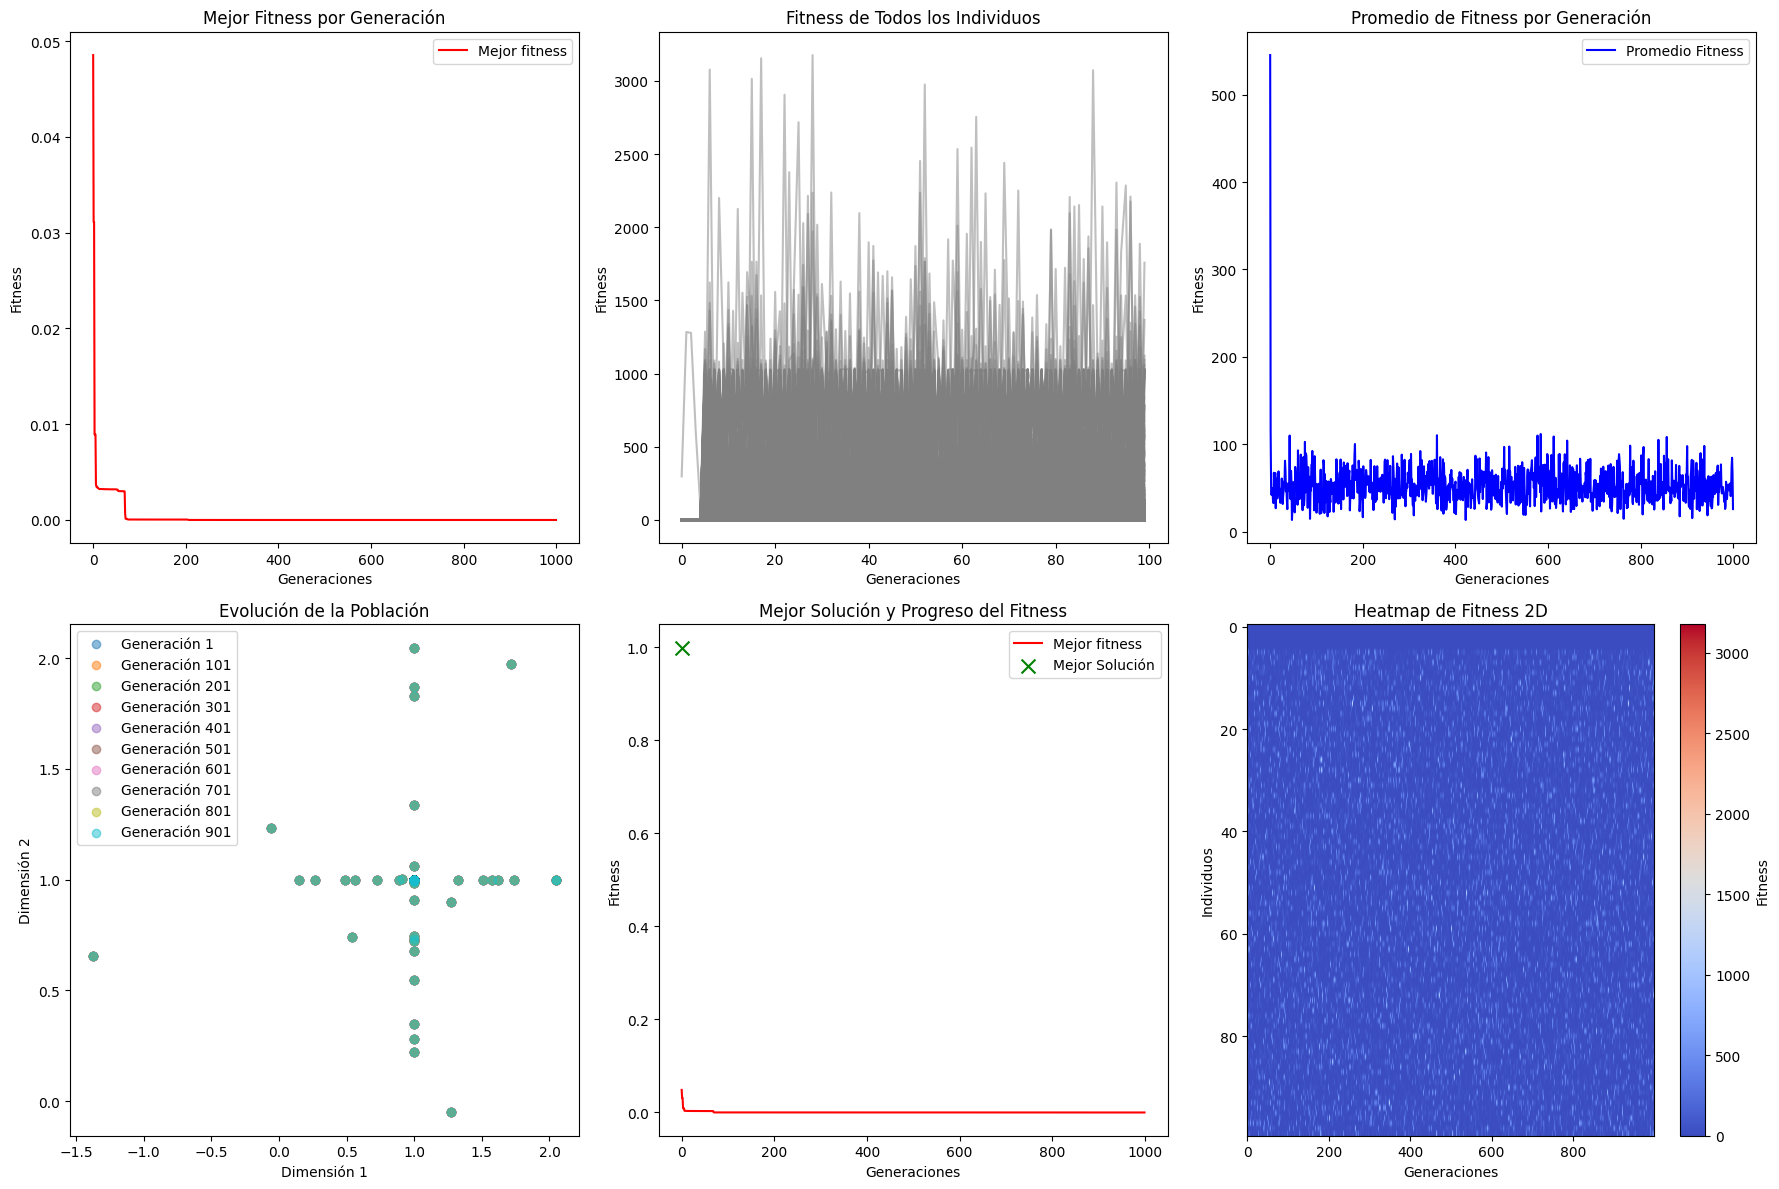

In [39]:

mejor_solucion, mejor_fitness, historial_mejores, historial_fitness, poblacion = optimizar(
    tamano_poblacion=100, generaciones=1000, dimensiones=2
)
print(f"Mejor solución encontrada: {mejor_solucion}")
print(f"Mejor fitness encontrado: {mejor_fitness}")
dimensiones = 2

#  progreso de la optimización
plt.figure(figsize=(18, 12))

# 1. Mejor fitness por generación
plt.subplot(2, 3, 1)
plt.plot(historial_mejores, label='Mejor fitness', color='red')
plt.xlabel('Generaciones')
plt.ylabel('Fitness')
plt.title('Mejor Fitness por Generación')
plt.legend()

# 2. Fitness de todos los individuos
plt.subplot(2, 3, 2)
plt.plot(np.array(historial_fitness).T, alpha=0.5, color='gray')
plt.xlabel('Generaciones')
plt.ylabel('Fitness')
plt.title('Fitness de Todos los Individuos')

# 3. Promedio de fitness por generación
promedio_fitness = [np.mean(generacion) for generacion in historial_fitness]
plt.subplot(2, 3, 3)
plt.plot(promedio_fitness, label='Promedio Fitness', color='blue')
plt.xlabel('Generaciones')
plt.ylabel('Fitness')
plt.title('Promedio de Fitness por Generación')
plt.legend()

# 4. Evolución de la población (scatter plot de cada generación)
plt.subplot(2, 3, 4)
for gen in range(0, 1000, 100):
    plt.scatter(*zip(*poblacion), label=f'Generación {gen+1}', alpha=0.5)
plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')
plt.title('Evolución de la Población')
plt.legend()

# 5. Mejor fitness y su posición en el espacio 2D
plt.subplot(2, 3, 5)
plt.plot(historial_mejores, label='Mejor fitness', color='red')
plt.scatter(mejor_solucion[0], mejor_solucion[1], label='Mejor Solución', color='green', s=100, marker='x')
plt.xlabel('Generaciones')
plt.ylabel('Fitness')
plt.title('Mejor Solución y Progreso del Fitness')
plt.legend()

# 6. Heatmap de fitness en 2D
if dimensiones == 2:
    fitness_2d = np.array(historial_fitness).T
    plt.subplot(2, 3, 6)
    plt.imshow(fitness_2d, cmap='coolwarm', aspect='auto')
    plt.colorbar(label='Fitness')
    plt.xlabel('Generaciones')
    plt.ylabel('Individuos')
    plt.title('Heatmap de Fitness 2D')

plt.tight_layout()
plt.show()